Successfully loaded the data.
Shape of the dataset (samples, features): (100, 10000)

Data has been standardized.


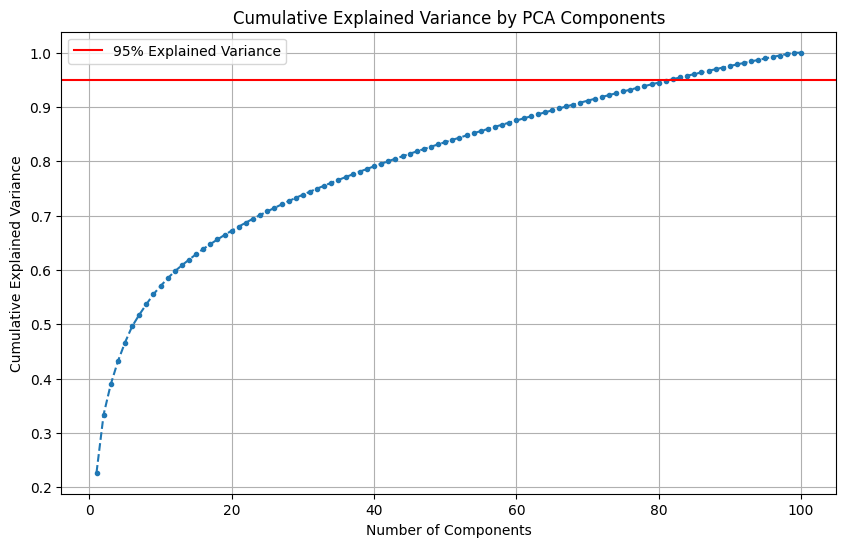


Number of components needed to explain 95% of variance: 82

Shape of the new dataset after PCA: (100, 82)
First 5 rows of the new dataset:
        PC_1       PC_2       PC_3       PC_4      PC_5       PC_6      PC_7  \
0  48.434711 -11.971637   9.384175 -13.681404 -2.791388 -18.708299  0.726353   
1  51.156409 -42.180636 -13.535714  17.885403  8.285316  36.034125 -7.156693   
2  52.047866 -13.194001   8.790788 -11.317344 -1.332553 -18.356588 -0.142543   
3  43.509097 -33.819778  -7.973959  -3.685078  2.016148  20.463890  4.580887   
4  16.622969  55.259148  -0.607175  -7.021252 -1.853609   3.323673  5.101032   

        PC_8       PC_9      PC_10  ...     PC_73     PC_74     PC_75  \
0 -10.887163 -14.508743  -1.783902  ...  3.930940 -2.201668 -4.858330   
1  -2.569291   3.561277  16.136542  ... -9.763430 -2.304635  3.233863   
2  -8.569225 -12.047121  -1.570554  ... -9.110655  3.019535 -5.944477   
3 -25.582381  -5.344925 -22.116497  ...  0.432549  3.189544  0.145148   
4   1.793926  

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

file_path = 'arcene_train.data'
data = pd.read_csv(file_path, sep='\\s+', header=None)

    
data.dropna(axis=1, how='all', inplace=True)

print("Successfully loaded the data.")
print("Shape of the dataset (samples, features):", data.shape)




scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print("\nData has been standardized.")

  
pca = PCA()
pca.fit(scaled_data)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

  
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='.', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
    # Add a line for 95% variance
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.legend(loc='best')
plt.show()

    # Find the number of components needed to explain 95% of the variance
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"\nNumber of components needed to explain 95% of variance: {n_components_95}")

    # Step 5: Perform PCA with the chosen number of components
    # Now, let's perform PCA again, but this time reducing the dimensions.
pca_final = PCA(n_components=n_components_95)
principal_components = pca_final.fit_transform(scaled_data)

    # The result is a new dataset with reduced dimensions
principal_df = pd.DataFrame(data=principal_components,
                                 columns=[f'PC_{i+1}' for i in range(n_components_95)])

print("\nShape of the new dataset after PCA:", principal_df.shape)
print("First 5 rows of the new dataset:")
print(principal_df.head())